# **SYNC INTERN TASK 2**

**REAL TIME FACE MASK DETECTION**

In [8]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [9]:
with_mask='/content/drive/MyDrive/face detection dataset'
without_mask='/content/drive/MyDrive/face detection without mask'
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask       1150
without_mask    1041

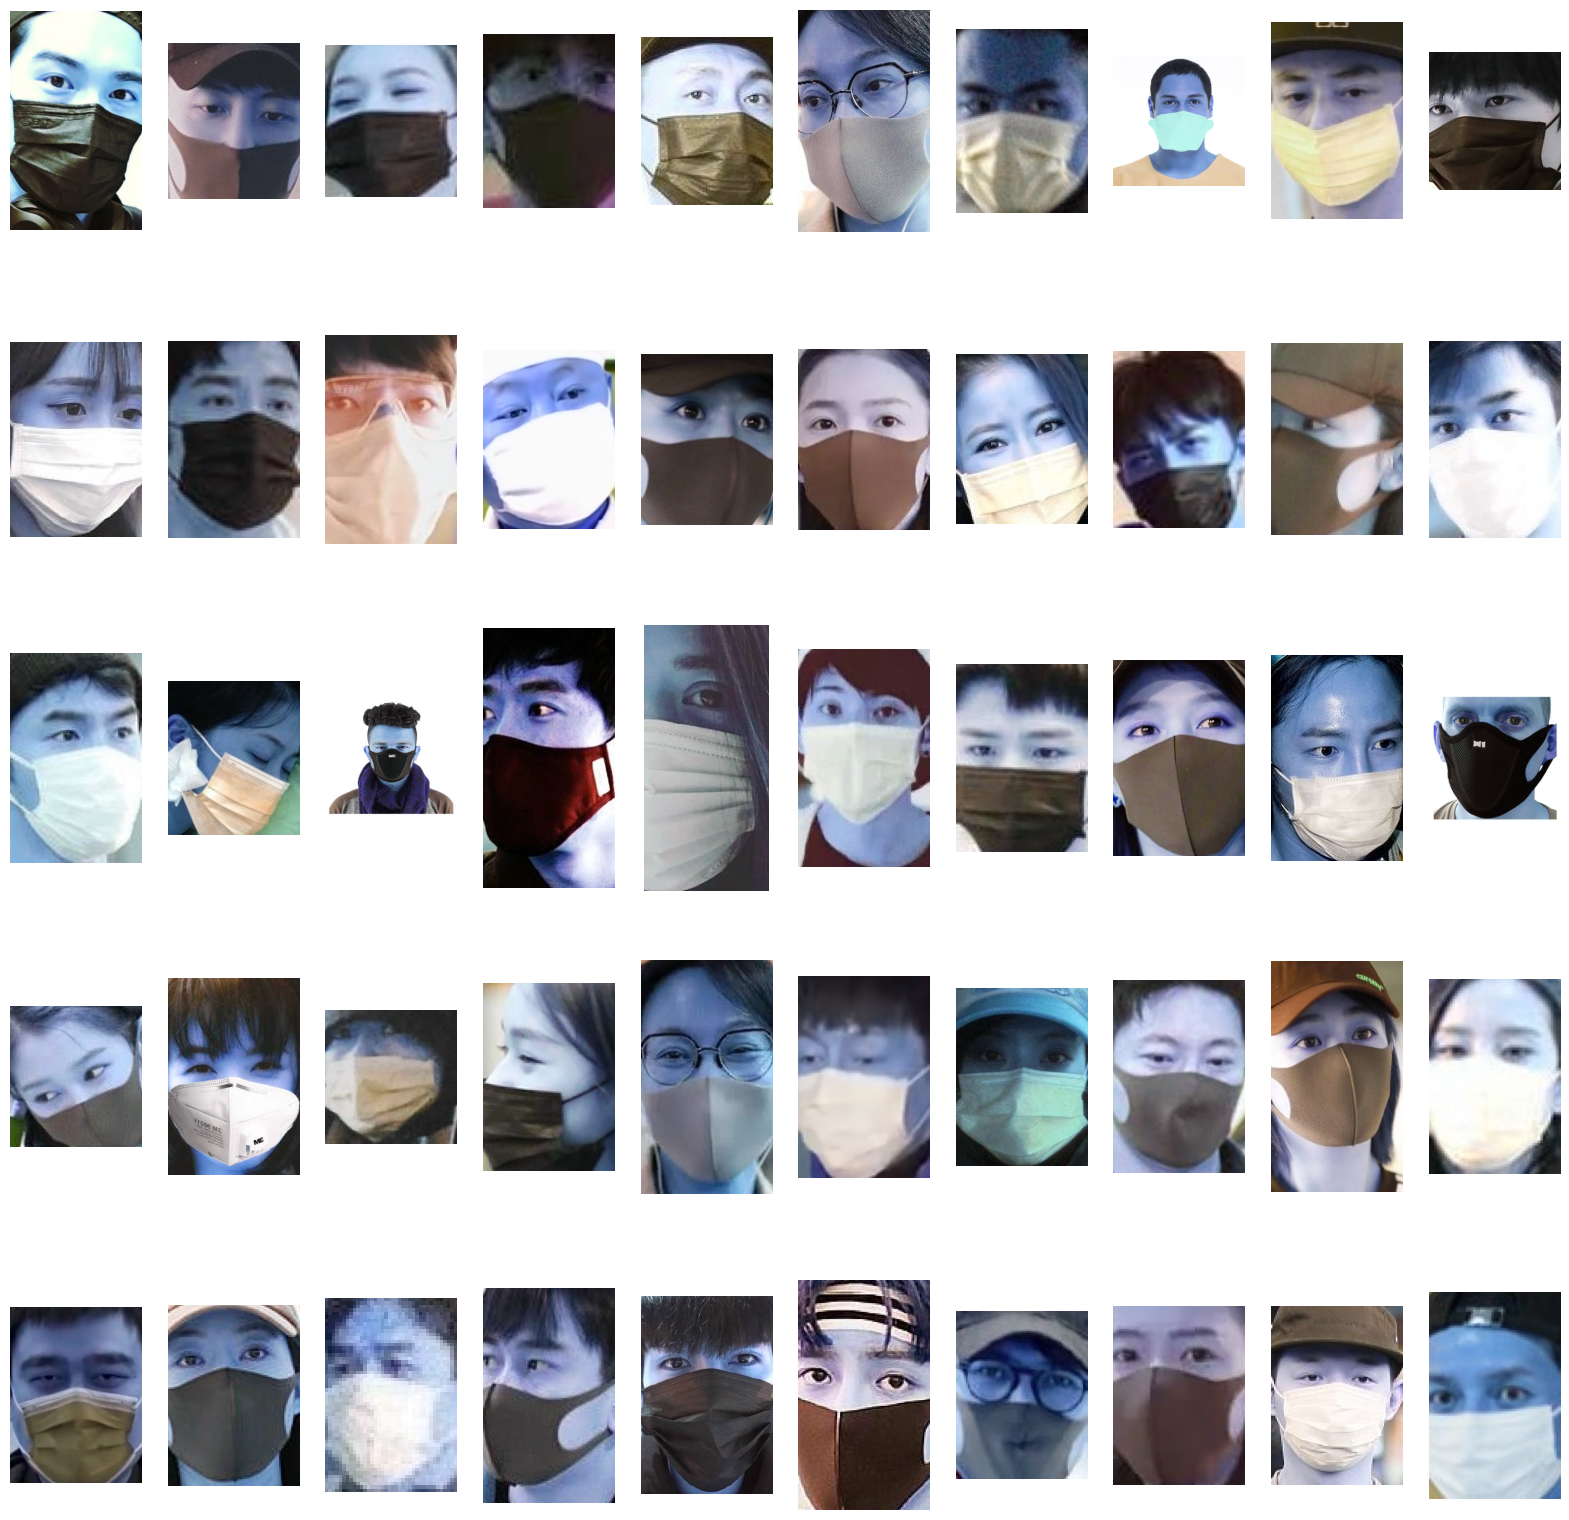

In [11]:
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

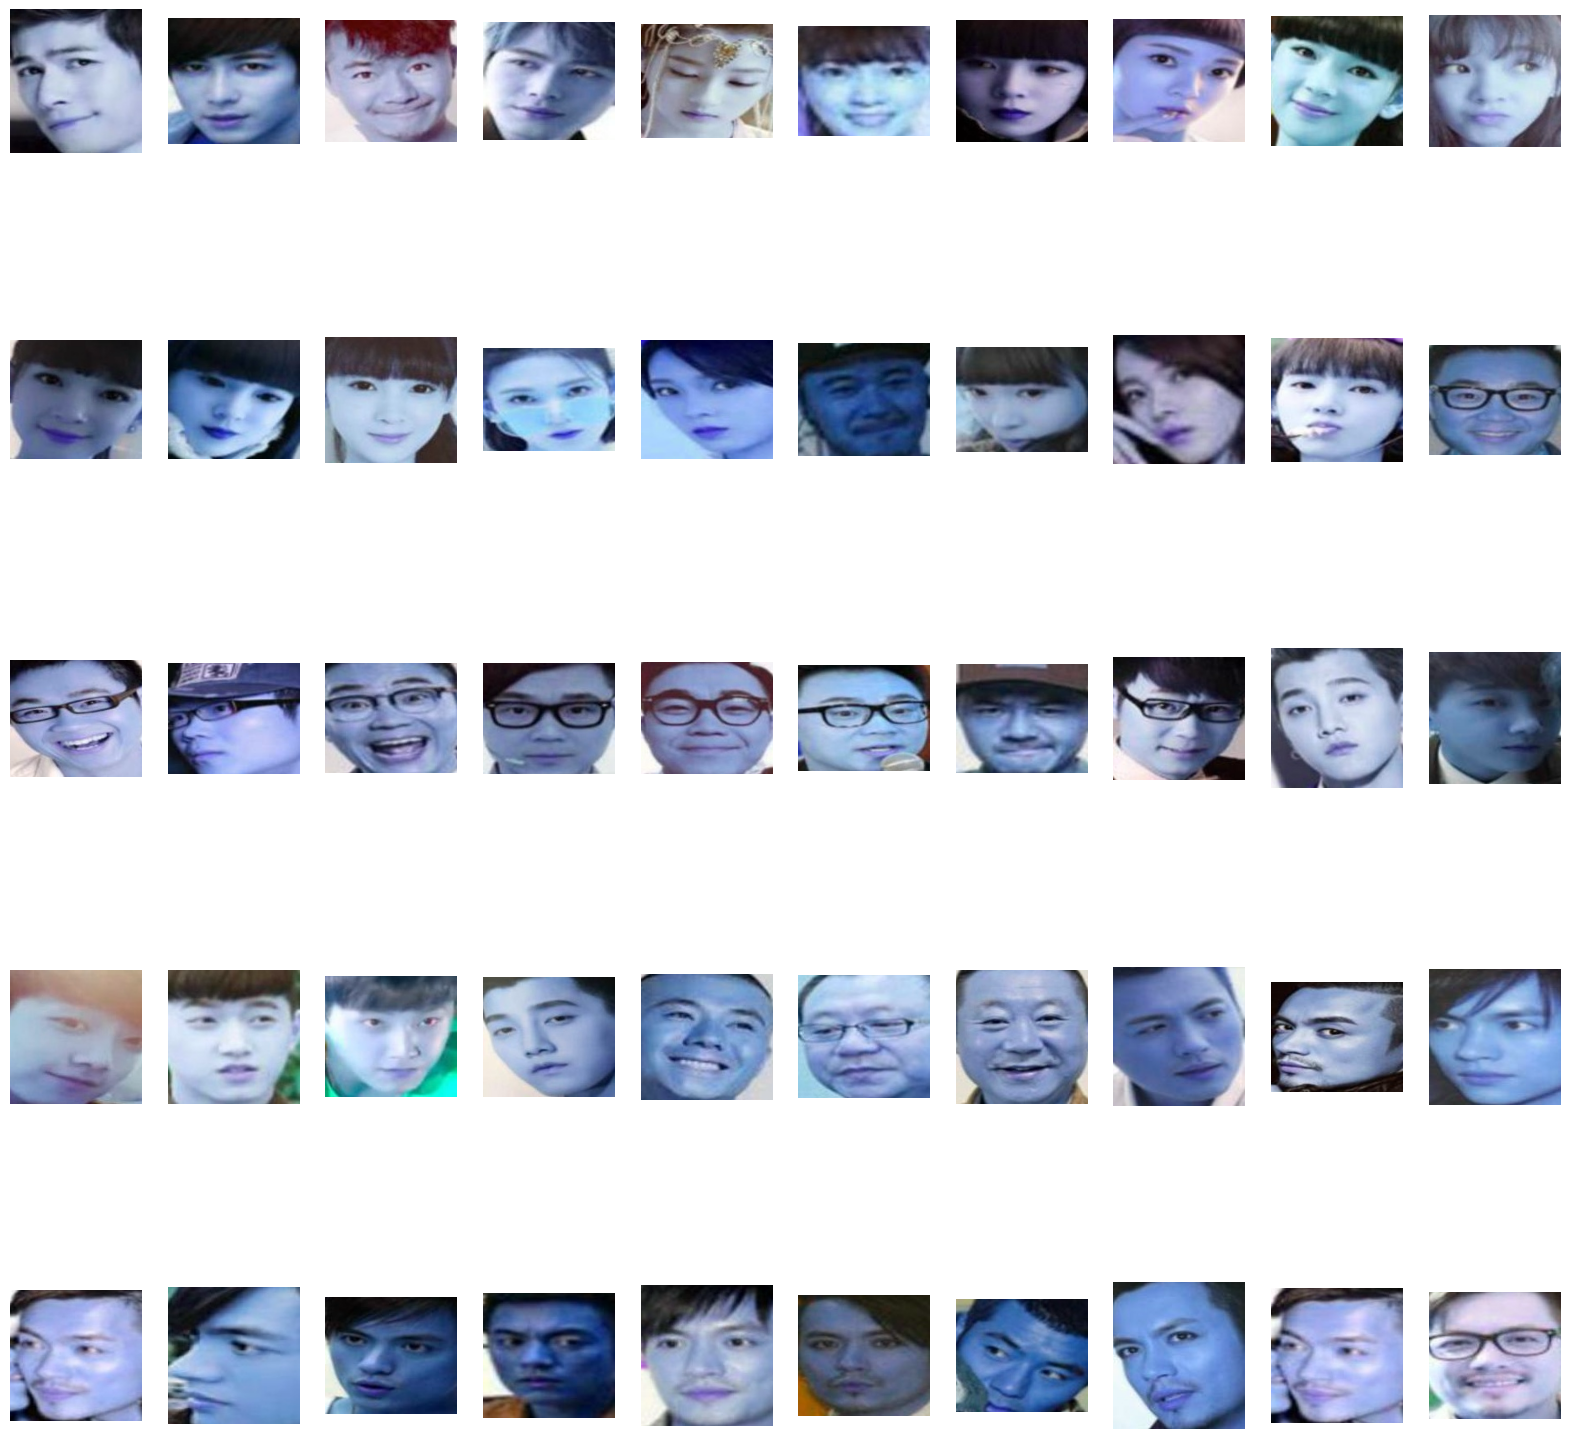

In [ ]:
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [ ]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [ ]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])

Number
(183, 275, 3)      14
(133, 140, 3)       7
(194, 259, 3)       6
(168, 300, 3)       6
(131, 151, 3)       5
...               ...
(101, 73, 3)        1
(204, 123, 3)       1
(797, 498, 3)       1
(100, 67, 3)        1
(114, 129, 3)       1

[1753 rows x 1 columns]

In [ ]:
#Resize Image
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

In [ ]:
data=np.array(data)
label=np.array(label)
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (1862, 128, 128, 3)
X Test Shape is : (329, 128, 128, 3)
Y Train Shape is : (1862,)
Y Test Shape is : (329,)


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.1)

Epoch 1/10
53/53 [==============================] - 35s 622ms/step - loss: 8.3332 - accuracy: 0.7910 - val_loss: 0.2277 - val_accuracy: 0.9412
Epoch 2/10
53/53 [==============================] - 34s 636ms/step - loss: 0.1800 - accuracy: 0.9481 - val_loss: 0.0873 - val_accuracy: 0.9626
Epoch 3/10
53/53 [==============================] - 31s 593ms/step - loss: 0.0969 - accuracy: 0.9725 - val_loss: 0.0692 - val_accuracy: 0.9733
Epoch 4/10
53/53 [==============================] - 31s 595ms/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0831 - val_accuracy: 0.9519
Epoch 5/10
53/53 [==============================] - 31s 596ms/step - loss: 0.1112 - accuracy: 0.9713 - val_loss: 0.1393 - val_accuracy: 0.9305
Epoch 6/10
53/53 [==============================] - 32s 600ms/step - loss: 0.0943 - accuracy: 0.9761 - val_loss: 0.1299 - val_accuracy: 0.9626
Epoch 7/10
53/53 [==============================] - 33s 608ms/step - loss: 0.0629 - accuracy: 0.9785 - val_loss: 0.0899 - val_accuracy: 0.9679

In [ ]:
hist=pd.DataFrame(hist.history)
hist

loss  accuracy  val_loss  val_accuracy
0  8.333187  0.791045  0.227711      0.941176
1  0.180019  0.948060  0.087289      0.962567
2  0.096925  0.972537  0.069225      0.973262
3  0.068114  0.979702  0.083082      0.951872
4  0.111160  0.971343  0.139262      0.930481
5  0.094297  0.976119  0.129930      0.962567
6  0.062941  0.978507  0.089929      0.967914
7  0.080644  0.978507  0.164713      0.957219
8  0.050949  0.982090  0.132957      0.951872
9  0.085926  0.974925  0.161859      0.951872

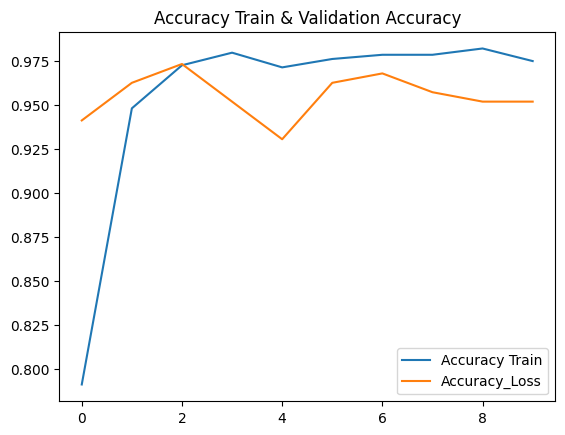

In [ ]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

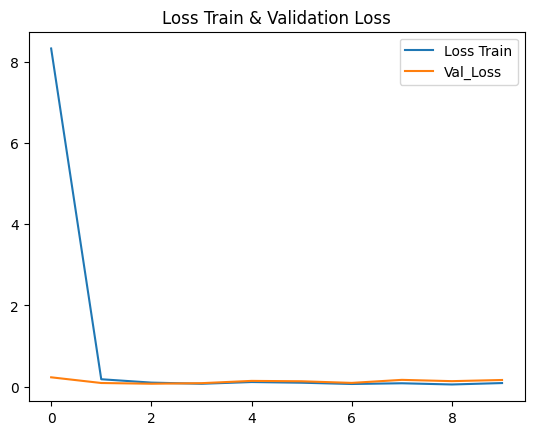

In [ ]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

11/11 [==============================] - 3s 318ms/step - loss: 0.1235 - accuracy: 0.9635
Test Loss = 0.12350870668888092
Test Accuracy = 0.9635258316993713


In [ ]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

Prediction
0       with mask
1    without mask
2    without mask
3    without mask
4    without mask
..            ...
324  without mask
325  without mask
326  without mask
327     with mask
328  without mask

[329 rows x 1 columns]

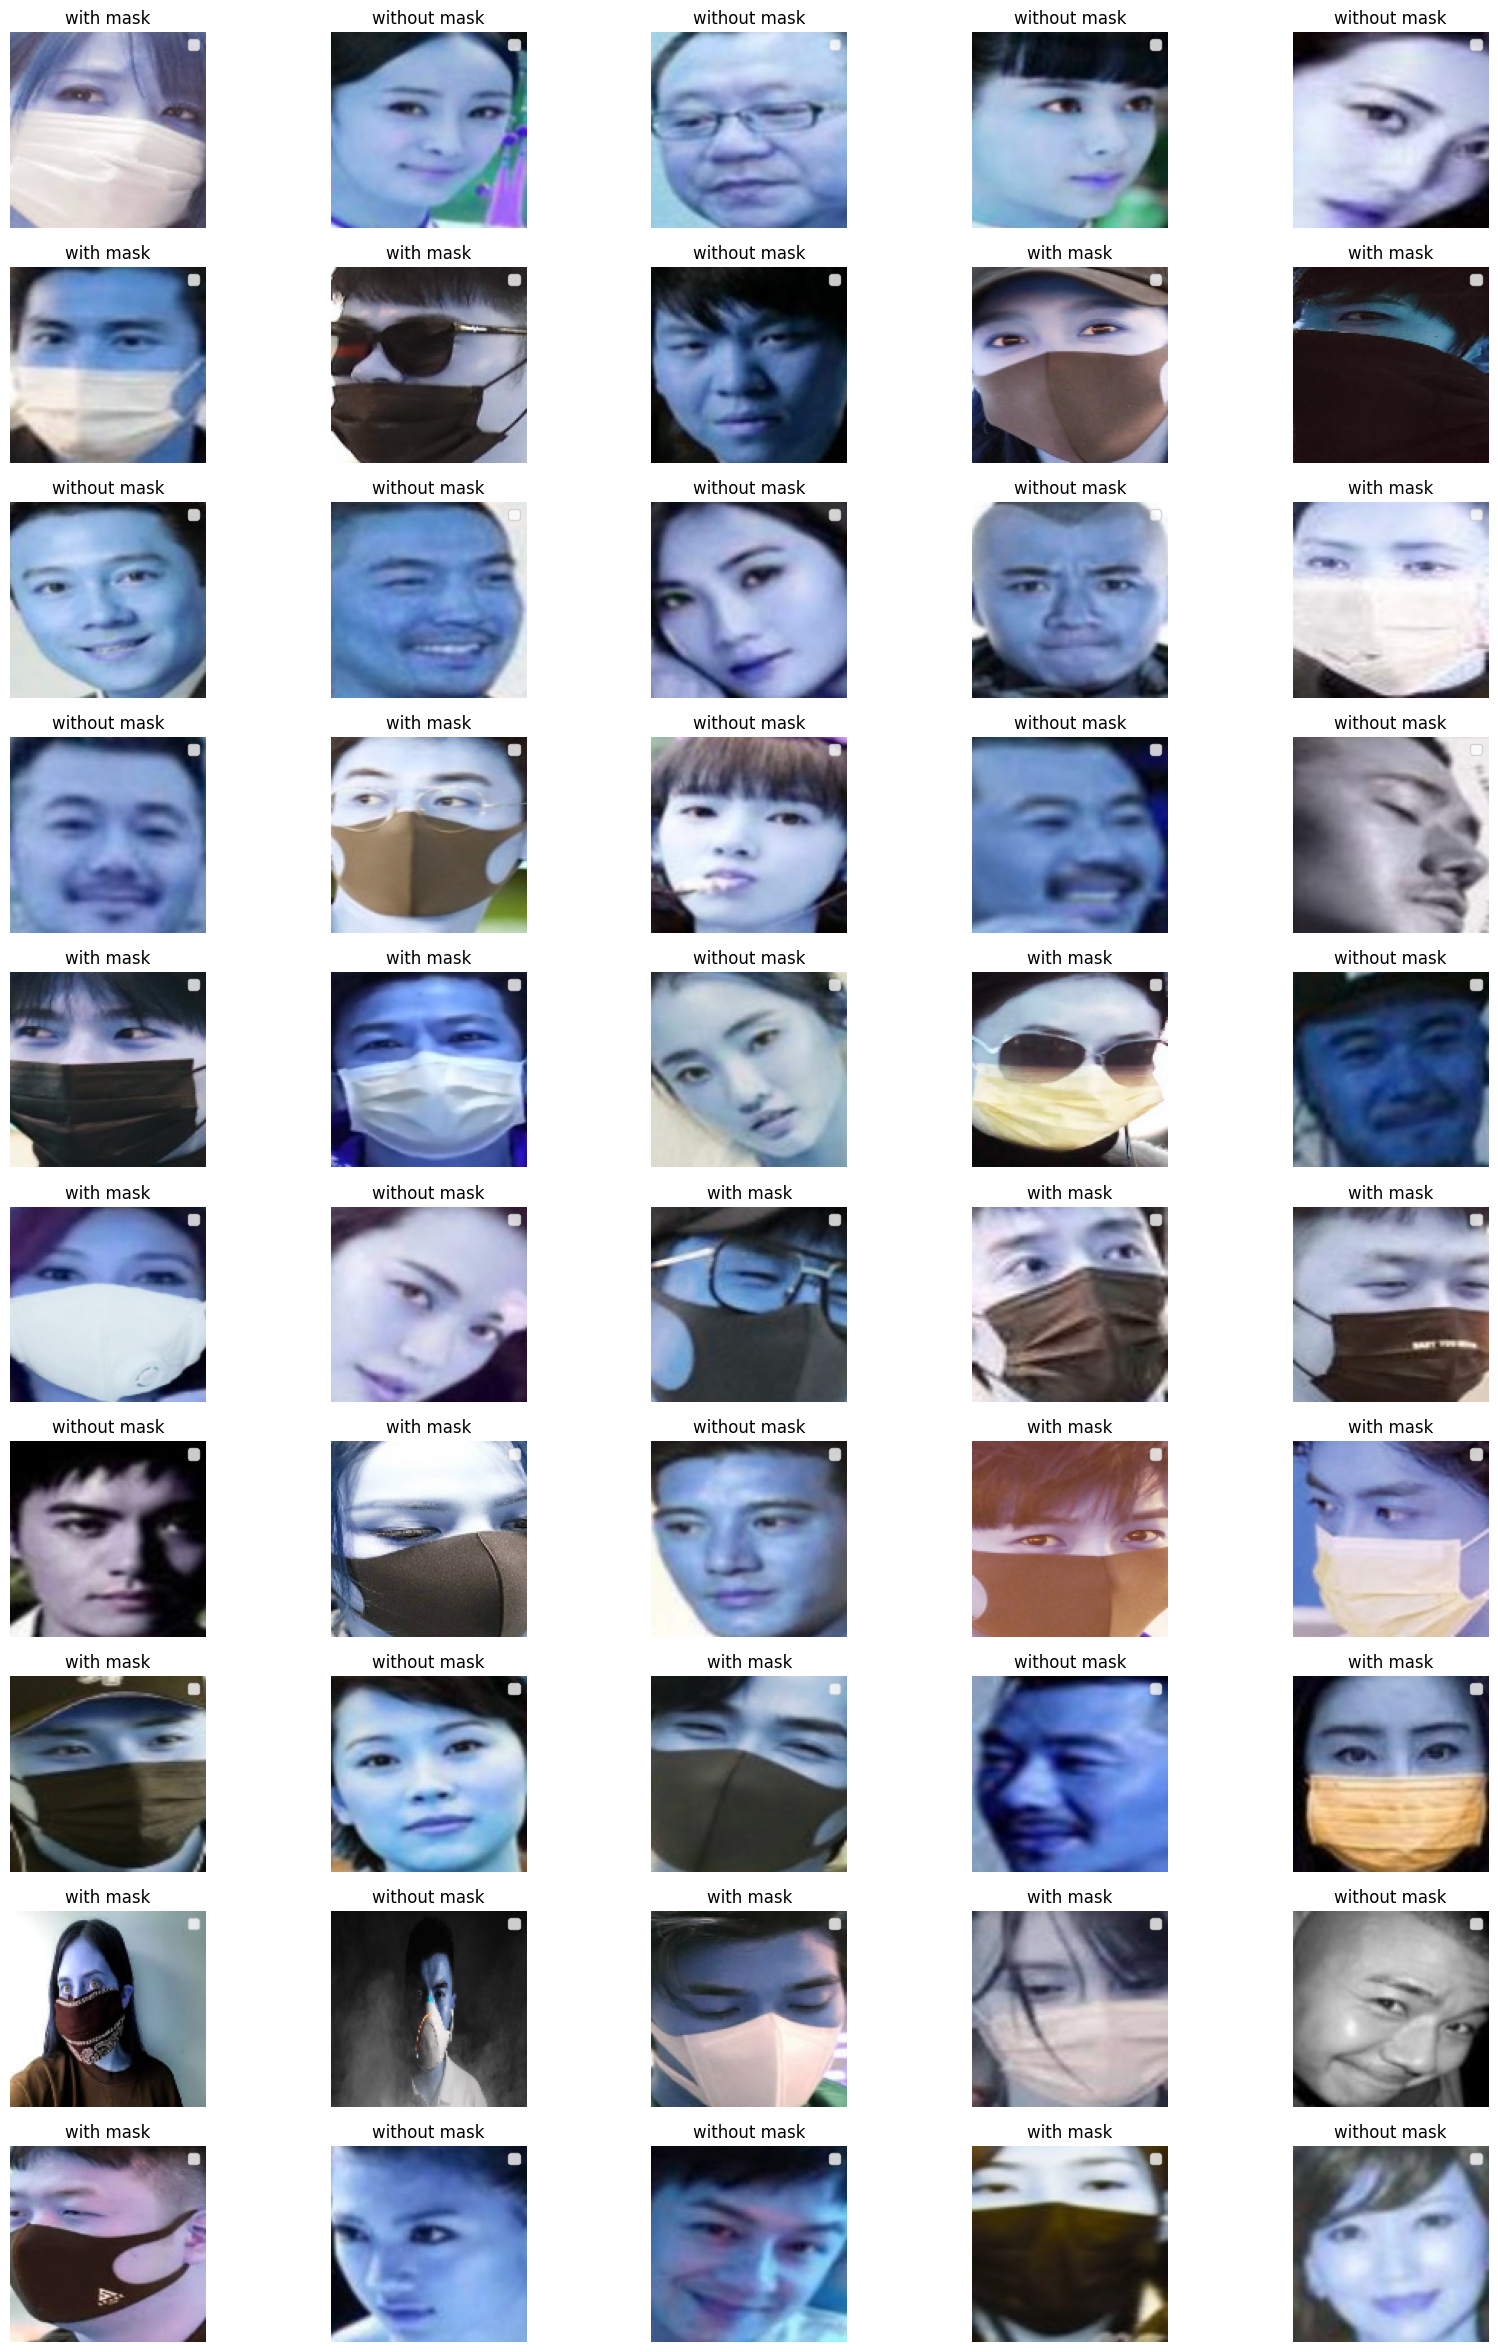

In [ ]:
plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')


array([[147,   0],
       [ 12, 170]])

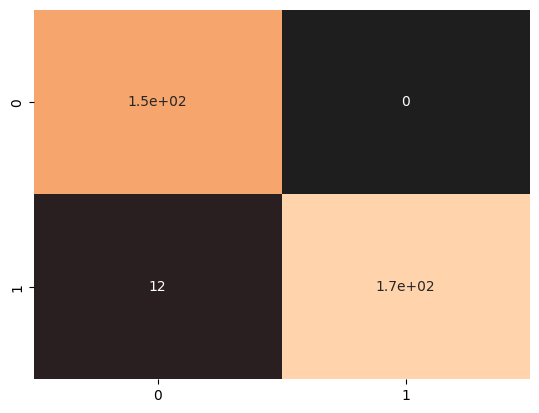

In [ ]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.92      1.00      0.96       147
           1       1.00      0.93      0.97       182

    accuracy                           0.96       329
   macro avg       0.96      0.97      0.96       329
weighted avg       0.97      0.96      0.96       329

